# Task1
*Gradient descent with Regression
#ToDO
- i will use Batch Gradient descent in optimization 
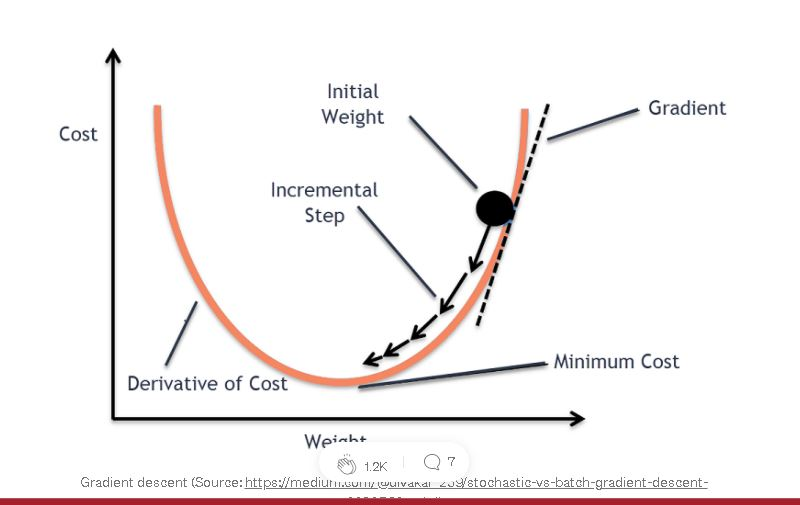

# import our libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from mpl_toolkits.mplot3d import Axes3D

# download data &preprocessing

In [2]:
x,y=datasets.make_regression(n_samples=100, n_features=1,
                                 n_informative=10, n_targets=1, bias=1.0, 
                                 noise=0.0, shuffle=True,
                                 random_state=0)


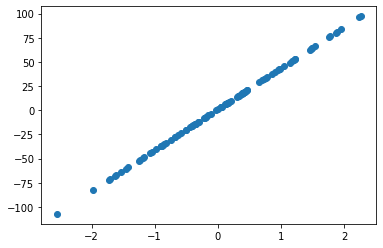

In [3]:
plt.scatter(x,y)

In [4]:
#explore data
x.shape

(100, 1)

In [5]:
y.shape

(100,)

In [6]:
y=y.reshape((-1,1))

In [7]:
y.shape

(100, 1)

# split data

In [8]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


# prepare the model (linear regression)

# function of batch gradient 
-"""input parameter :
 X: is training data
 y: is the output or label 
 
 lr: which is learning rate it is a hyper parameter to increase the gradient speed

max_epoch : maximun number of iteration that the algorithm will take until reach to the optimum 



______________
function return :
theta:list of paramter for every feature
cost_fun:vector of costs in each iteration
epoch:list of number of iteration until convergance




"""

In [54]:
def Batch_GD(features,labels,lr,max_epoch):
    #intialize parameter
    epoch=[]
    cost_fun=[]
    theta=np.zeros((features.shape[1],1))  #vector of thetas (1*n) n: is the dim of features
    thetas=[]
    bias=[]
    intercep=[]
    for i in range(max_epoch):
            y_predict=np.dot(features,theta)  #(m*1)
            cost=1/(2*len(features))*np.dot(np.transpose(y_predict-labels),(y_predict-labels))   #scaler
            gradient=1/(len(features)) *np.dot(np.transpose(features),y_predict-labels) #(n*1)
            theta=theta-(lr*gradient)
            epoch.append(i)
            cost_fun.append(cost[0,0])
            thetas.append(theta[0,0])
            bias.append(theta[0])
            intercep.append(theta[1])
    
          
   
    return theta,cost_fun,epoch,thetas,bias,intercep,y_predict

In [10]:
#add bias to features
bias=np.ones_like(X_train)
#bias


In [11]:
new_xtrain=np.concatenate((bias,X_train),axis=1)
#new_xtrain

In [55]:
theta,cost_fun,epoch,thetas,bias,intercep,hyposises=Batch_GD(new_xtrain,y_train,.01,1000)

In [13]:
#plt.plot(thetas,cost_fun)

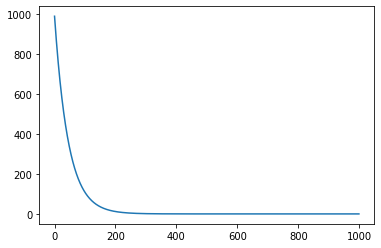

In [14]:
plt.plot(epoch,cost_fun)

In [27]:
tbias=np.ones_like(X_test)
xnewtest=np.concatenate((tbias,X_test),axis=1)
xnewtest.shape

(30, 2)

In [29]:
ypr=xnewtest@theta
s=metrics.r2_score(ypr,y_test)

In [30]:
s

0.9999999994192672

In [37]:
# plt.plot(xnewtest,y_test,'b.')

# Compare your final weights with the output from a Normal Equation solution

In [ ]:
#justify by normal equation 
print(np.linalg.inv(np.transpose(X_train)@(X_train))@np.transpose(X_train)@y_train)

#yes the slope is near to my expect